# Importing Libraries

In [155]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Exploring the Data

In [157]:
# Load Dataset
heart = pd.read_csv('/Users/lochoang/Desktop/IndependentStudy/heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [158]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [159]:
heart.describe

<bound method NDFrame.describe of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0        

# Preprocesssing and Cleaning Data

In [161]:
# Data Preprocessing // Cleaning
distinct_count = len(heart.drop_duplicates())
dupe_count = len(heart) - distinct_count
print(f'{distinct_count} distinct rows and {dupe_count} duplicate rows. The original set has {distinct_count + dupe_count} rows')

302 distinct rows and 723 duplicate rows. The original set has 1025 rows


In [162]:
# Null rows
null_values = len(heart.dropna())
print(f'After dropping every null row, there remains {null_values} meaning that are no null rows')

After dropping every null row, there remains 1025 meaning that are no null rows


In [163]:
# Remove duplicate rows
heart = heart.drop_duplicates()

# Feature / Data Visualization

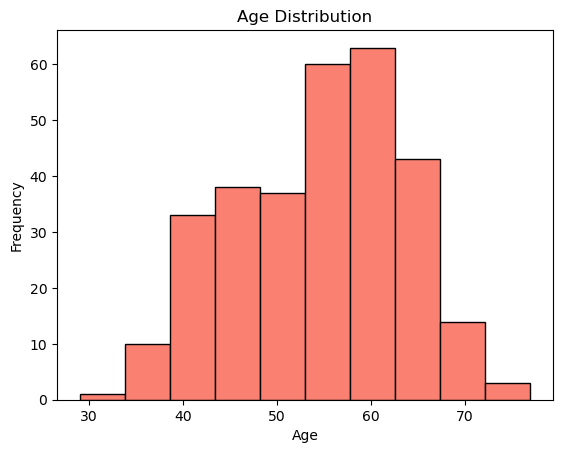

In [165]:
plt.hist(heart['age'], color='salmon', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

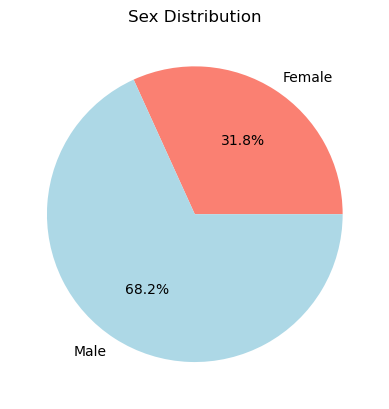

In [166]:
# pie graph for sex distribution
plt.pie(heart['sex'].value_counts().sort_index(), labels=['Female', 'Male'], autopct='%1.1f%%', colors=['salmon', 'lightblue'])
plt.title('Sex Distribution')
plt.show()


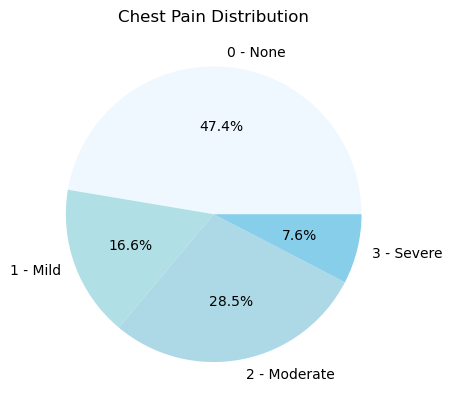

In [167]:
# chest pain distribution
plt.pie(heart['cp'].value_counts().sort_index(), labels = ['0 - None','1 - Mild','2 - Moderate','3 - Severe'], autopct = '%1.1f%%',colors=['aliceblue','powderblue','lightblue','skyblue'])
plt.title('Chest Pain Distribution')
plt.show()


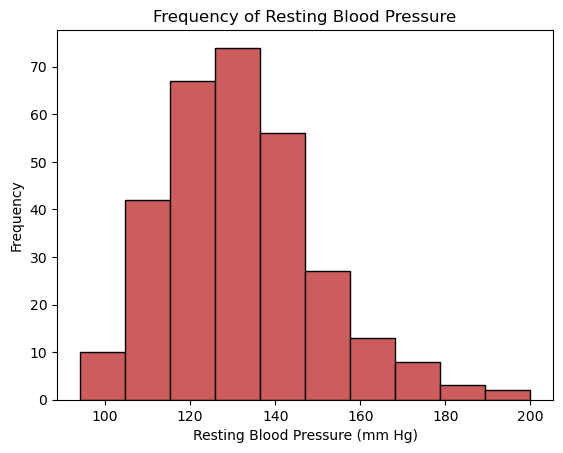

In [168]:
plt.hist(heart['trestbps'],color=['indianred'],edgecolor='black')
plt.title('Frequency of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.show()

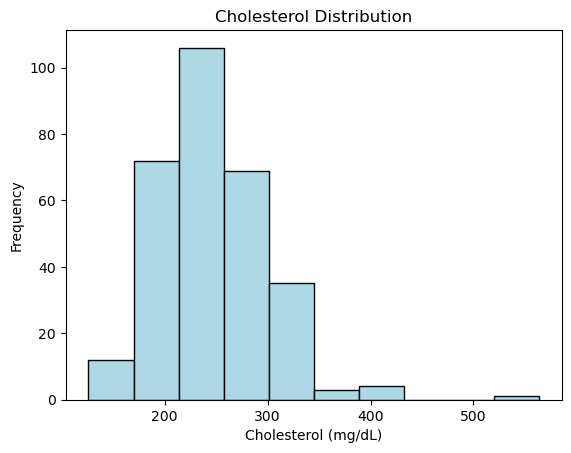

In [169]:
plt.hist(heart['chol'],color=['lightblue'],edgecolor='black')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.show()

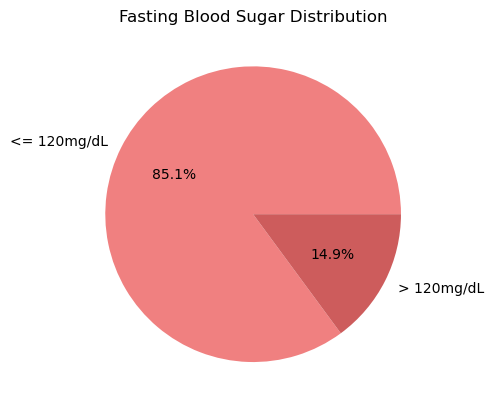

In [170]:
plt.pie(heart['fbs'].value_counts().sort_index(), labels=['<= 120mg/dL', '> 120mg/dL'], autopct='%1.1f%%', colors=['lightcoral', 'indianred'])
plt.title('Fasting Blood Sugar Distribution')
plt.show()

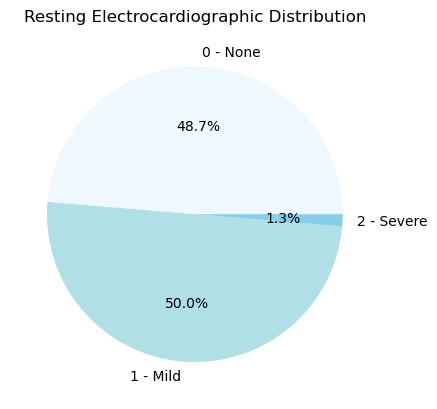

In [171]:
plt.pie(heart['restecg'].value_counts().sort_index(),labels=['0 - None', '1 - Mild','2 - Severe'],autopct='%1.1f%%',colors=['aliceblue','powderblue','skyblue'])
plt.title('Resting Electrocardiographic Distribution')
plt.show()

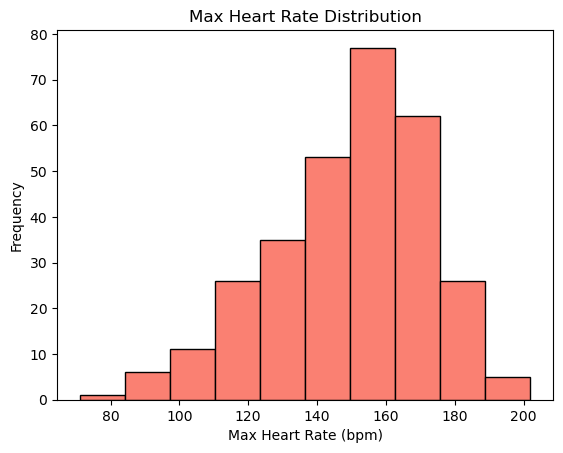

In [172]:
plt.hist(heart['thalach'],color='salmon',edgecolor='black')
plt.title('Max Heart Rate Distribution')
plt.xlabel('Max Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

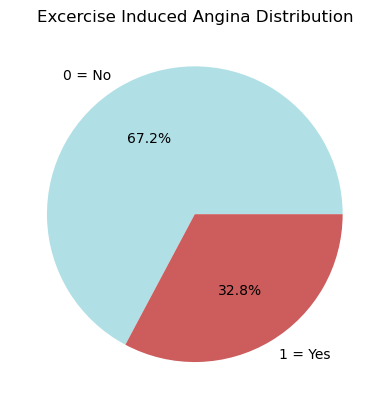

In [173]:
plt.pie(heart['exang'].value_counts().sort_index(),labels=['0 = No','1 = Yes'],autopct='%1.1f%%',colors=['powderblue','indianred'])
plt.title('Excercise Induced Angina Distribution')
plt.show()

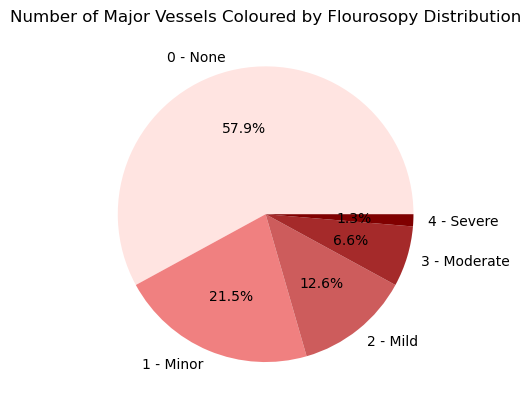

In [174]:
plt.pie(heart['ca'].value_counts().sort_index(), labels=['0 - None','1 - Minor','2 - Mild','3 - Moderate','4 - Severe'], autopct='%1.1f%%', colors=['mistyrose', 'lightcoral', 'indianred', 'brown', 'maroon'])
plt.title('Number of Major Vessels Coloured by Flourosopy Distribution')
plt.show()

# Target vs Feature Data Visualization

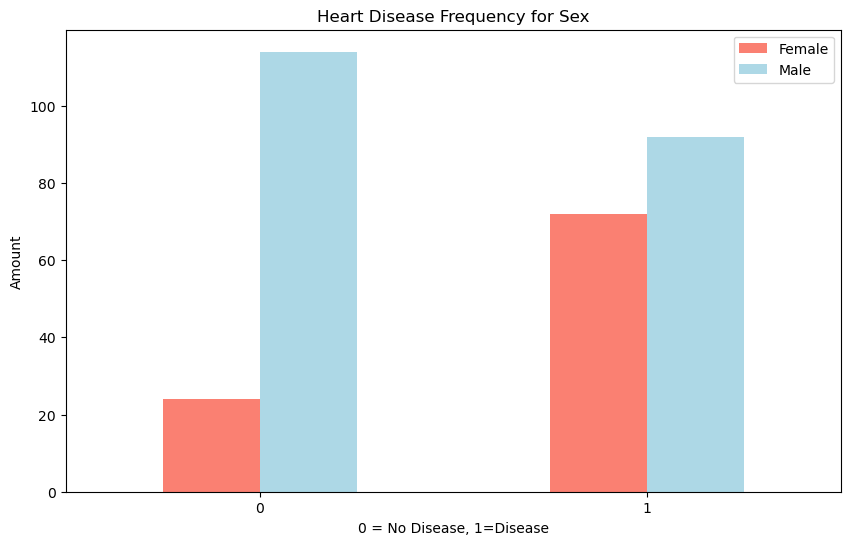

In [176]:
# heart disease frequency vs sex
pd.crosstab(heart.target, heart.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

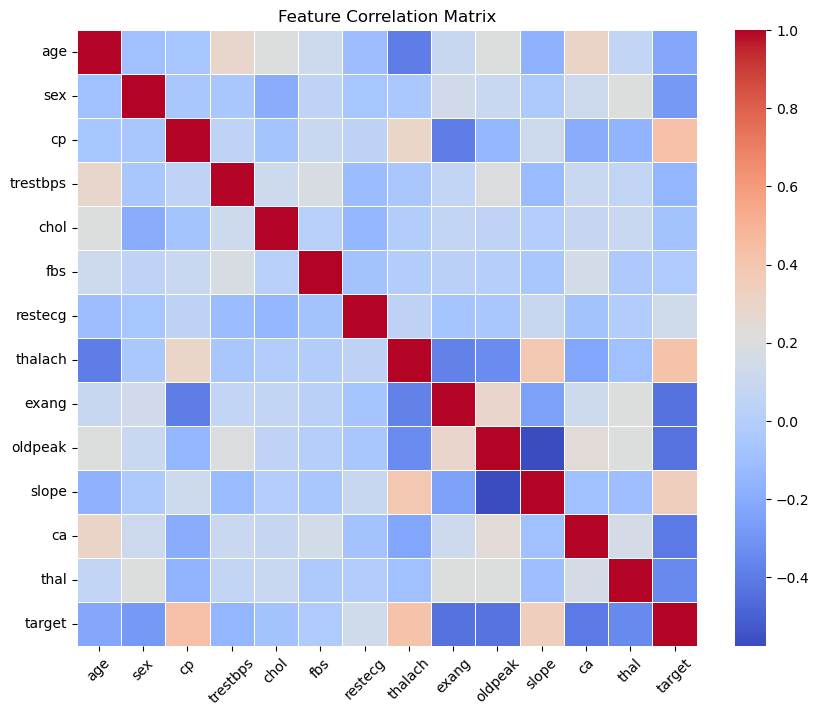

In [177]:
corr_matrix = heart.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Models

In [179]:
# log reg
X = heart.drop('target', axis=1) 
y = heart['target']
X.fillna(X.mean())  
#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [180]:
# splitting data set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=314,
                                                    test_size=0.25, 
                                                    shuffle=True) 

In [181]:
model = LogisticRegression(max_iter=750)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [182]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print('25 True Negatives, 7 False Postives, 4 False Negatives, 40 True Positives')

Accuracy: 0.8552631578947368
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.85      0.91      0.88        44

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76

Confusion Matrix:
 [[25  7]
 [ 4 40]]
25 True Negatives, 7 False Postives, 4 False Negatives, 40 True Positives


In [183]:
log_reg = sm.Logit(y_train, X_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.334280
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  226
Model:                          Logit   Df Residuals:                      213
Method:                           MLE   Df Model:                           12
Date:                Mon, 14 Apr 2025   Pseudo R-squ.:                  0.5164
Time:                        12:57:42   Log-Likelihood:                -75.547
converged:                       True   LL-Null:                       -156.22
Covariance Type:            nonrobust   LLR p-value:                 2.801e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0169      0.023      0.749      0.454      -0.027       0.061
sex           -1.8748      0.

In [184]:
# training model on significant features that have a p-value < .05
sig_ft = ['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal','restecg','trestbps']  

X = heart[sig_ft]
y = heart['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=314,
                                                    test_size=0.25, 
                                                    shuffle=True) 


In [185]:
model = LogisticRegression(max_iter=750)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [186]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.868421052631579
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.85      0.93      0.89        44

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.86        76
weighted avg       0.87      0.87      0.87        76

Confusion Matrix:
 [[25  7]
 [ 3 41]]


In [187]:
X = heart[['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']].copy()

X['thalach_sq'] = X['thalach'] ** 2
X['oldpeak_sq'] = X['oldpeak'] ** 2

X['cp_sex'] = X['cp'] * X['sex']
X['ca_thal'] = X['ca'] * X['thal']

X = sm.add_constant(X)
y = heart['target']

log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.357021
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                           11
Date:                Mon, 14 Apr 2025   Pseudo R-squ.:                  0.4822
Time:                        12:57:42   Log-Likelihood:                -107.82
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 5.126e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9884      6.258      0.158      0.875     -11.278      13.255
sex           -0.9976      0.

In [188]:
base_features = ['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']
X = heart[base_features].copy()

squared_vars = ['thalach', 'oldpeak','cp']
for var in squared_vars:
    X[f'{var}_sq'] = X[var] ** 2
interaction_vars = ['sex', 'cp', 'ca', 'thal']
interactions = list(itertools.combinations(interaction_vars, 2))

for var1, var2 in interactions:
    X[f'{var1}_{var2}'] = X[var1] * X[var2]
X = sm.add_constant(X)
y = heart['target']
log_reg = sm.Logit(y, X).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.343979
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      285
Method:                           MLE   Df Model:                           16
Date:                Mon, 14 Apr 2025   Pseudo R-squ.:                  0.5011
Time:                        12:57:42   Log-Likelihood:                -103.88
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 1.403e-35
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8016      6.703      1.015      0.310      -6.335      19.939
sex           -5.9031      2.

In [189]:
selected_features = ['ca', 'thal', 'ca_thal', 'sex', 'exang', 'sex_thal']  
X = sm.add_constant(X)
X = X[selected_features]
y = heart['target']

log_reg = sm.Logit(y, X).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.496065
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            5
Date:                Mon, 14 Apr 2025   Pseudo R-squ.:                  0.2805
Time:                        12:57:42   Log-Likelihood:                -149.81
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 1.496e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ca            -0.7706      0.561     -1.373      0.170      -1.870       0.329
thal           0.9622      0.

# Tabulation Charts

In [276]:
# def features & target
feature_cols = ['cp','sex','fbs','thal','slope','restecg','exang']
target_col = 'target'


In [278]:
# test/train split 80/20
train_df, test_df = train_test_split(heart,
                                     test_size=.2,
                                     random_state=314,
                                     stratify=heart[target_col])

In [280]:
#train log reg model
model = LogisticRegression(max_iter=1000)
model.fit(train_df[feature_cols], train_df[target_col])

LogisticRegression(max_iter=1000)

In [282]:
# add prediction to both sets
train_df['actual'] = train_df[target_col]
train_df['predicted'] = model.predict(train_df[feature_cols])

test_df['actual'] = test_df[target_col]
test_df['predicted'] = model.predict(test_df[feature_cols])

In [284]:
# tab chart function
def tabulate_category(df_train, df_test, cat_col):
    def compute_stats(df, label):
        summary = df.groupby(cat_col).agg(
            **{
                f'{label}_records': (cat_col, 'count'),
                f'{label}_actual': ('actual', 'sum'),
                f'{label}_predicted': ('predicted', 'sum')
            }
        ).reset_index()
        summary[f'{label}_error'] = abs(summary[f'{label}_actual'] - summary[f'{label}_predicted']) / summary[f'{label}_actual'].replace(0, 1)
        return summary
    train_summary = compute_stats(df_train, 'train')
    test_summary = compute_stats(df_test, 'test')

    merged = pd.merge(train_summary, test_summary, on=cat_col, how='outer')
    merged = merged.fillna(0)

    total = merged[[col for col in merged.columns if col != cat_col]].sum().to_dict()
    total[cat_col] = 'Total'
    merged = pd.concat([merged, pd.DataFrame([total])], ignore_index=True)

    return merged

In [292]:
categorical_columns = ['cp', 'sex', 'fbs','thal', 'slope','restecg','exang']
for col in categorical_columns:
    tab_df = tabulate_category(train_df, test_df, col)
    display(Markdown(f"### Tab Chart for: `{col}`"))
    display(tab_df)

### Tab Chart for: `cp`

,cp,train_records,train_actual,train_predicted,train_error,test_records,test_actual,test_predicted,test_error
0,0,401.0,99.0,78.0,0.212121,96.0,23.0,22.0,0.043478
1,1,132.0,104.0,112.0,0.076923,35.0,30.0,29.0,0.033333
2,2,229.0,178.0,190.0,0.067416,55.0,41.0,45.0,0.097561
3,3,58.0,40.0,55.0,0.375000,19.0,11.0,19.0,0.727273
4,Total,820.0,421.0,435.0,0.731460,205.0,105.0,115.0,0.901645


### Tab Chart for: `sex`

,sex,train_records,train_actual,train_predicted,train_error,test_records,test_actual,test_predicted,test_error
0,0,245.0,176.0,182.0,0.034091,67.0,50.0,53.0,0.060000
1,1,575.0,245.0,253.0,0.032653,138.0,55.0,62.0,0.127273
2,Total,820.0,421.0,435.0,0.066744,205.0,105.0,115.0,0.187273


### Tab Chart for: `fbs`

,fbs,train_records,train_actual,train_predicted,train_error,test_records,test_actual,test_predicted,test_error
0,0,699.0,364.0,375.0,0.030220,173.0,91.0,97.0,0.065934
1,1,121.0,57.0,60.0,0.052632,32.0,14.0,18.0,0.285714
2,Total,820.0,421.0,435.0,0.082851,205.0,105.0,115.0,0.351648


### Tab Chart for: `thal`

,thal,train_records,train_actual,train_predicted,train_error,test_records,test_actual,test_predicted,test_error
0,0,6.0,2.0,2.0,0.00000,1.0,1.0,1.0,0.000000
1,1,53.0,16.0,23.0,0.43750,11.0,5.0,6.0,0.200000
2,2,430.0,323.0,338.0,0.04644,114.0,89.0,95.0,0.067416
3,3,331.0,80.0,72.0,0.10000,79.0,10.0,13.0,0.300000
4,Total,820.0,421.0,435.0,0.58394,205.0,105.0,115.0,0.567416


### Tab Chart for: `slope`

,slope,train_records,train_actual,train_predicted,train_error,test_records,test_actual,test_predicted,test_error
0,0,65.0,23.0,4.0,0.826087,9.0,5.0,2.0,0.600000
1,1,385.0,127.0,135.0,0.062992,97.0,31.0,32.0,0.032258
2,2,370.0,271.0,296.0,0.092251,99.0,69.0,81.0,0.173913
3,Total,820.0,421.0,435.0,0.981330,205.0,105.0,115.0,0.806171


### Tab Chart for: `restecg`

,restecg,train_records,train_actual,train_predicted,train_error,test_records,test_actual,test_predicted,test_error
0,0,399.0,176.0,183.0,0.039773,98.0,38.0,44.0,0.157895
1,1,409.0,242.0,249.0,0.028926,104.0,67.0,71.0,0.059701
2,2,12.0,3.0,3.0,0.000000,3.0,0.0,0.0,0.000000
3,Total,820.0,421.0,435.0,0.068698,205.0,105.0,115.0,0.217596


### Tab Chart for: `exang`

,exang,train_records,train_actual,train_predicted,train_error,test_records,test_actual,test_predicted,test_error
0,0,541.0,360.0,397.0,0.102778,139.0,95.0,107.0,0.126316
1,1,279.0,61.0,38.0,0.377049,66.0,10.0,8.0,0.200000
2,Total,820.0,421.0,435.0,0.479827,205.0,105.0,115.0,0.326316


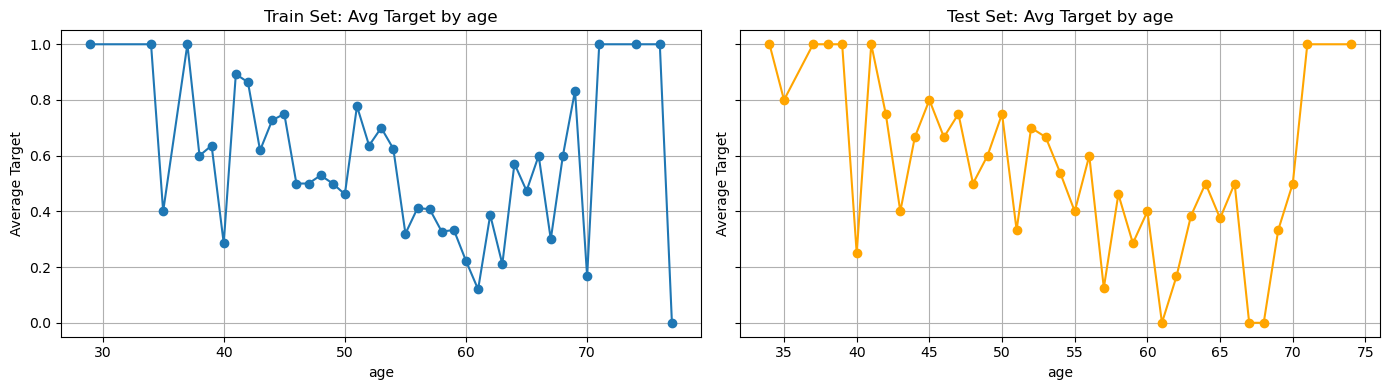

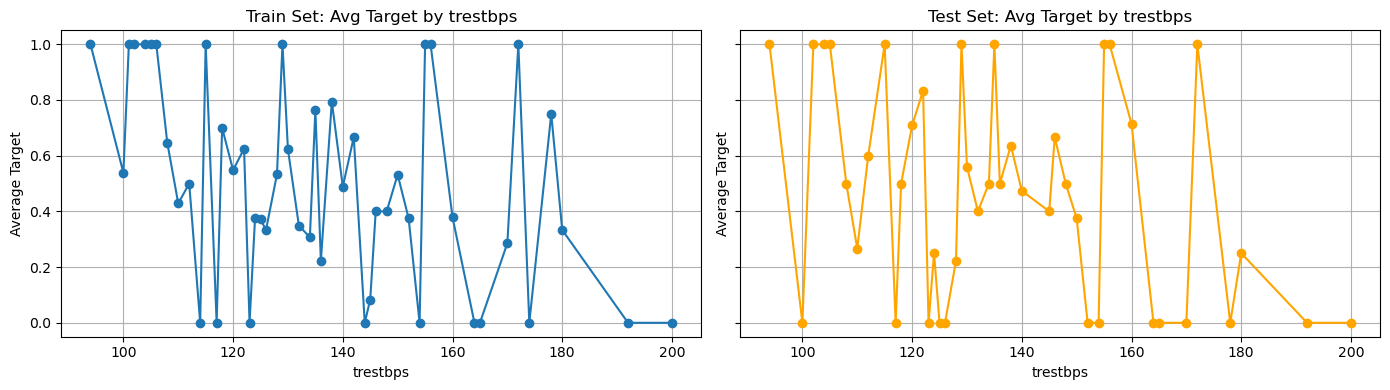

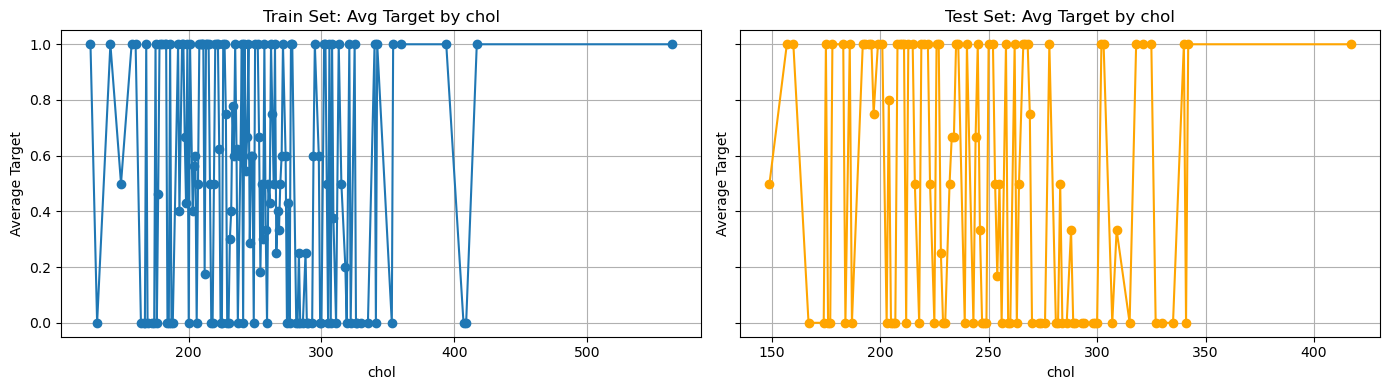

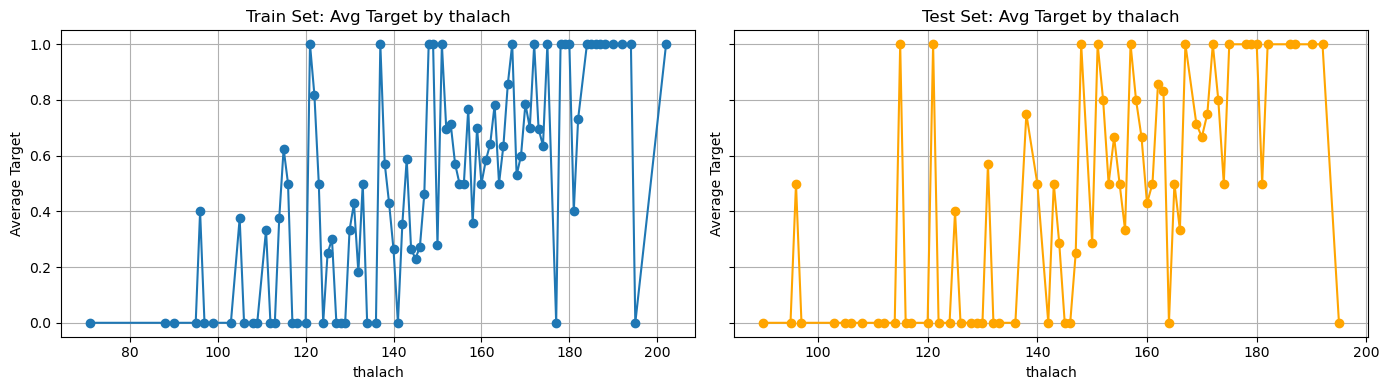

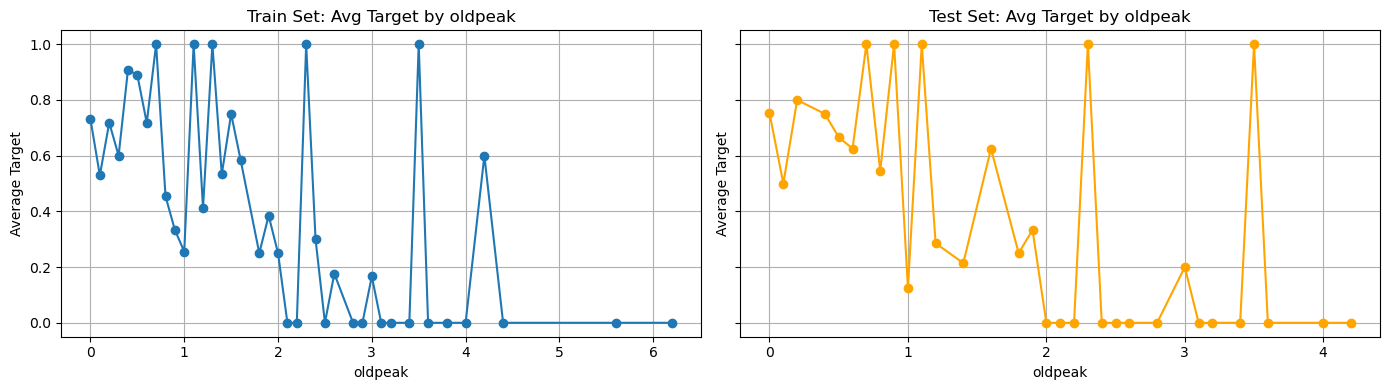

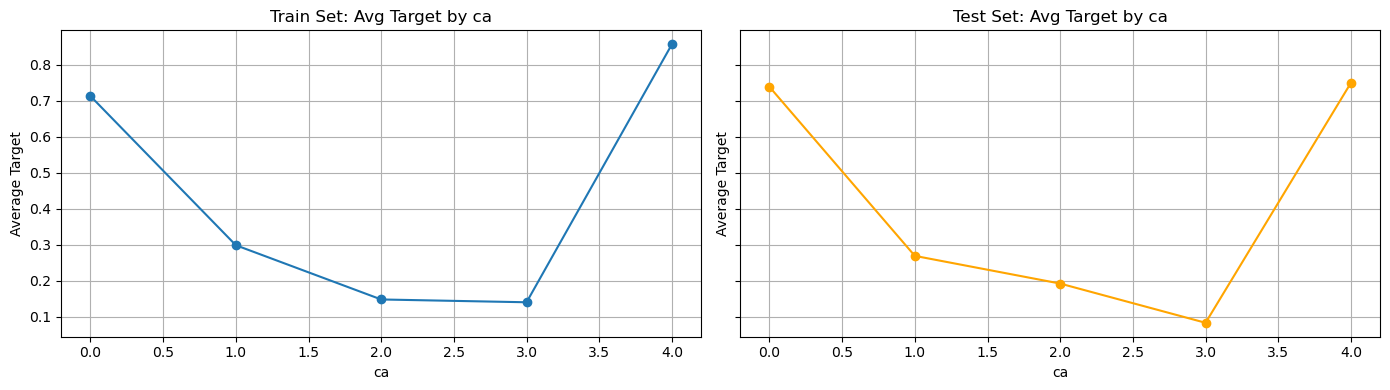

In [302]:
# Define your numeric columns
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']  # Update based on your dataset

# Plot average target for each numeric variable
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)
    
    # Train set line plot
    train_grouped = train_df.groupby(col)['target'].mean()
    axes[0].plot(train_grouped.index, train_grouped.values, marker='o', linestyle='-')
    axes[0].set_title(f"Train Set: Avg Target by {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Average Target")
    axes[0].grid(True)

    # Test set line plot
    test_grouped = test_df.groupby(col)['target'].mean()
    axes[1].plot(test_grouped.index, test_grouped.values, marker='o', color='orange', linestyle='-')
    axes[1].set_title(f"Test Set: Avg Target by {col}")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Average Target")
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()
